# CNN Model


*   The code below was written and compiled in Google Colab, but can be downloaded and run in jupyter notebooks with additional necessary imports [tensorflow]

Below is the following:
*   A general CNN model with parameters that can be changed to investigate the effects of various model features







#**CNN Model**

Testing model with layers=2, neurons=[128, 64], activation=relu, dropout_rate=0.2
Testing model with layers=2, neurons=[128, 64], activation=relu, dropout_rate=0.35
Testing model with layers=2, neurons=[128, 64], activation=relu, dropout_rate=0.5
Testing model with layers=2, neurons=[128, 64], activation=tanh, dropout_rate=0.2
Testing model with layers=2, neurons=[128, 64], activation=tanh, dropout_rate=0.35
Testing model with layers=2, neurons=[128, 64], activation=tanh, dropout_rate=0.5
Testing model with layers=2, neurons=[128, 64], activation=sigmoid, dropout_rate=0.2
Testing model with layers=2, neurons=[128, 64], activation=sigmoid, dropout_rate=0.35
Testing model with layers=2, neurons=[128, 64], activation=sigmoid, dropout_rate=0.5
Testing model with layers=3, neurons=[256, 128, 64], activation=relu, dropout_rate=0.2
Testing model with layers=3, neurons=[256, 128, 64], activation=relu, dropout_rate=0.35
Testing model with layers=3, neurons=[256, 128, 64], activation=relu, dropo

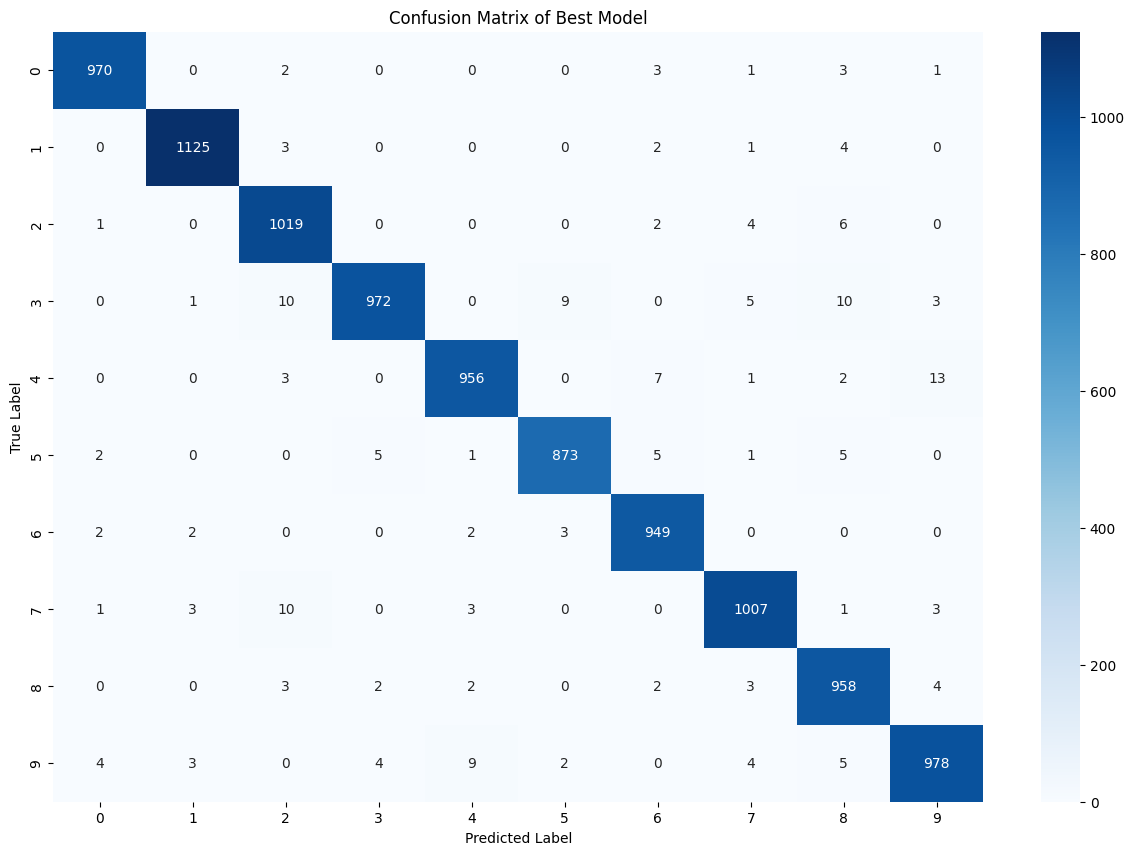

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.datasets import mnist              # dataset
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0],  -1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Create model function
def create_model(layers, neurons, activation, dropout_rate):
    model = Sequential()    # Sequentil model
    model.add(Dense(neurons[0], input_shape = (784,), activation = activation)) # Layers start

    for units in neurons[1:]:
        model.add(Dense(units, activation = activation))
        model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation = 'softmax'))    # Output layet
    model.compile(loss = 'categorical_crossentropy', optimizer =Adam(), metrics = ['accuracy'])

    return model

# Parameters to test
layer_configs = [2, 3, 4]   # Layers
neuron_configs = [
    [128, 64],              # Configurations of neurons per layer
    [256, 128, 64],
    [512, 256, 128, 64]
]
activations = ['relu', 'tanh', 'sigmoid']  # Activation functions to test
dropout_rates = [0.2, 0.35, 0.5]           # Dropout rates to test (short version cause takes too long)
                                           # Do separate dropout timing

# Loop through parameters
results = []
for layers in layer_configs:
    for neurons in neuron_configs:
        if len(neurons) == layers:          # To make sure neuron config matches number of layers
            for activation in activations:
                for dropout_rate in dropout_rates:
                    print(f"Testing model with layers={layers}, neurons={neurons }, activation={activation}, dropout_rate={dropout_rate}")
                    model = create_model(layers, neurons, activation, dropout_rate)
                    history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2, verbose=0)
                    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
                    results.append({
                        'layers': layers,
                        'neurons': neurons,
                        'activation': activation,
                        'dropout_rate': dropout_rate,
                        'test_loss': test_loss,
                        'test_acc': test_acc
                    })

# Print results in a nice table format
print("\nExperiment Results:\n")
print(f"{'Layers':<7}{ 'Neurons':<20} {'Activation':<10} {'Dropout':<10} {'Test Loss':<10} {'Test Accuracy':<12}")
print("="*70)
for result in results:
    print(f"{result['layers']:<7} {str(result['neurons']): <20 } {result['activation']:<10} {result['dropout_rate']: <10} {result['test_loss']:<10.4f} {result['test_acc']:<12.4f}")

# Find the best result and print
best_result = max(results, key=lambda x: x['test_acc'])
print(f"\nBest Result: Layers={best_result['layers']},  Neurons={best_result['neurons']}, Activation={best_result['activation']}, Dropout Rate={best_result['dropout_rate']}, Test Loss={best_result['test_loss']}, Test Accuracy={best_result['test_acc']}")

# Plot the confusion matrix of the best model
best_model = create_model(best_result['layers'], best_result['neurons'], best_result['activation'], best_result['dropout_rate'])
best_model.fit( x_train, y_train, batch_size =128, epochs = 10, validation_split = 0.2, verbose = 0)
y_pred = best_model.predict( x_test)
y_pred_classes = np.argmax( y_pred, axis=1)
y_true = np.argmax(y_test, axis = 1)
confusion_mtx  = confusion_matrix( y_true, y_pred_classes)
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(confusion_mtx, annot =True, fmt = 'd', cmap = "Blues", ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label' )
ax.set_title('Confusion Matrix of Best Model')
plt.show()


#**Testing with the EMNIST dataset**

In [31]:
# Download dataset if not loading from files
!pip install emnist

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import gzip
import os

# Code to load images
def load_emnist_gz(file_path, num_images, image_size):
    with gzip.open(file_path, 'rb') as f:
        f.read(16)
        buffer = f.read(image_size * image_size * num_images)
        data = np.frombuffer(buffer, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, image_size, image_size)
        return data

# Code to load respective labels
def load_emnist_labels(file_path, num_images):
    with gzip.open(file_path, 'rb') as f:
        f.read(8)
        buffer = f.read( num_images)
        labels = np.frombuffer(buffer, dtype=np.uint8)
        return  labels

# Paths to the EMNIST dataset files (change 'path' to where you downloaded the files)
train_images_path = 'path/emnist-digits-train-images-idx3-ubyte.gz'
train_labels_path = 'path/emnist-digits-train-labels-idx1-ubyte.gz'
test_images_path = 'path/emnist-digits-test-images-idx3-ubyte.gz'
test_labels_path = 'path/emnist-digits-test-labels-idx1-ubyte.gz'

x_test = load_emnist_gz(test_images_path, 40000, 28)    # Load EMNIST
y_test = load_emnist_labels(test_labels_path, 40000)

x_test = x_test/255.0  # Normalise pixels

# Flatten images (match MNIST shape?)
x_test_flattened = x_test.reshape(x_test.shape[0], 28 * 28)

y_test_one_hot = to_categorical(y_test, 10)   # one-hot encoded

# Load created trained model
best_model = create_model(best_result['layers'], best_result['neurons'], best_result['activation'], best_result['dropout_rate'])

# Predict labels of images
predictions = best_model.predict(x_test_flattened)
predicted_labels = np.argmax(predictions, axis=1)

accuracy = np.mean(predicted_labels == y_test)    # Calculate accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

# Evaluate model on the new data
loss, accuracy = best_model.evaluate(x_test_flattened, y_test_one_hot, verbose=0)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

# Display predictions with corresponding images
f, ax = plt.subplots(1, 9, figsize=(20, 2))

for i in range(min(len(x_test), 9)):
    ax[i].imshow(x_test[i], cmap='gray')
    ax[i].set_title(f"Predicted: {predicted_labels[i]}\nTrue: {y_test[i]}")
    ax[i].axis('off')

plt.tight_layout()
plt.show()

# Plot the confusion matrix
confusion_mtx = confusion_matrix(y_test, predicted_labels)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap="Blues", ax=ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix of EMNIST Digits Test Set')
plt.show()


# Some testing with graphs

*   Data from the model tests is input into the following code in order to graph results
*   No actual CNN coding, just data display





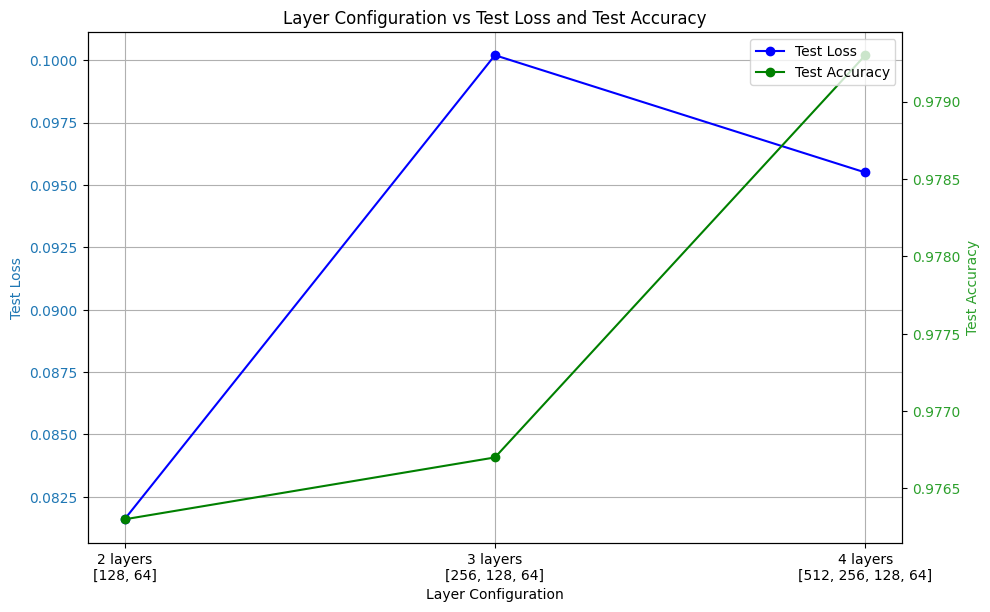

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data
layer_configurations = ['2 layers\n[128, 64]', '3 layers\n[256, 128, 64]', '4 layers\n[512, 256, 128, 64]']
test_loss = [0.0816, 0.1002, 0.0955]
test_accuracy = [0.9763,  0.9767, 0.9793]

# Create x-axis positions
x_pos = np.arange(len(layer_configurations))

# Create the plot
fig, ax1 =  plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Layer Configuration')
ax1.set_ylabel('Test Loss', color=color)
ax1.plot(x_pos, test_loss, 'bo-', label ='Test Loss')
ax1.tick_params(axis='y', labelcolor = color)
ax1.grid(True)

ax2 = ax1.twinx()  # Instantiate a second y-axis that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Test Accuracy', color=color)  # We already handled the x-label with ax1
ax2.plot(x_pos, test_accuracy, 'go-', label='Test Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

# Set x-axis labels
plt.xticks(x_pos, layer_configurations)

fig.tight_layout()  # Ensure the plot elements do not overlap

plt.title('Layer Configuration vs Test Loss and Test Accuracy')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()


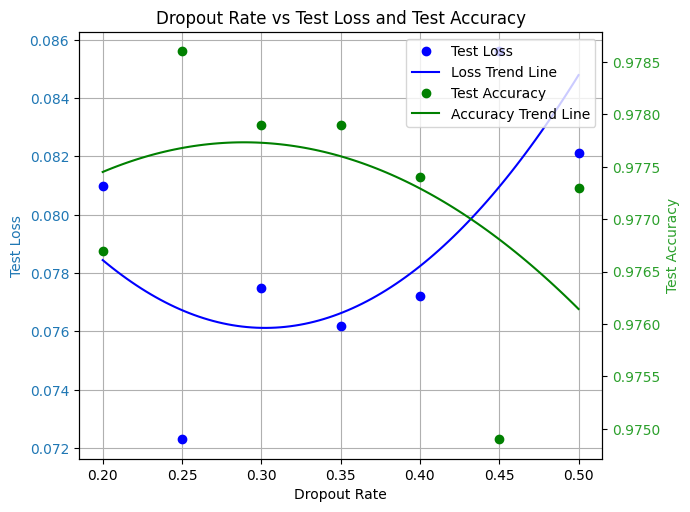

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
dropout_rates = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
test_loss = [0.0810, 0.0723, 0.0775, 0.0762, 0.0772, 0.0856, 0.0821]
test_accuracy = [0.9767, 0.9786, 0.9779, 0.9779, 0.9774, 0.9749, 0.9773]

# Fit polynomial to the data
loss_poly  = np.polyfit(dropout_rates, test_loss, 2)             # 2nd degree poly
accuracy_poly = np.polyfit( dropout_rates, test_accuracy, 2)     # 2nd degree poly
x_fit = np.linspace(min(dropout_rates), max(dropout_rates), 100)

loss_trend = np.polyval(loss_poly, x_fit)             # Trend lines
accuracy_trend = np.polyval(accuracy_poly, x_fit)

fig, ax1 = plt.subplots(figsize=(7, 5))   # Plot

# Plot with two y axes
# Format for graphs
color = 'tab:blue'
ax1.set_xlabel('Dropout Rate' )
ax1.set_ylabel('Test Loss', color=color)
ax1.plot(dropout_rates, test_loss, 'bo', label='Test Loss')
ax1.plot(x_fit, loss_trend, 'b-', label='Loss Trend Line')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()
 color = 'tab:green'
ax2.set_ylabel('Test Accuracy', color=color)
ax2.plot(dropout_rates, test_accuracy, 'go', label='Test Accuracy')
ax2.plot(x_fit, accuracy_trend, 'g-', label='Accuracy Trend Line')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

plt.title('Dropout Rate vs Test Loss and Test Accuracy')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()



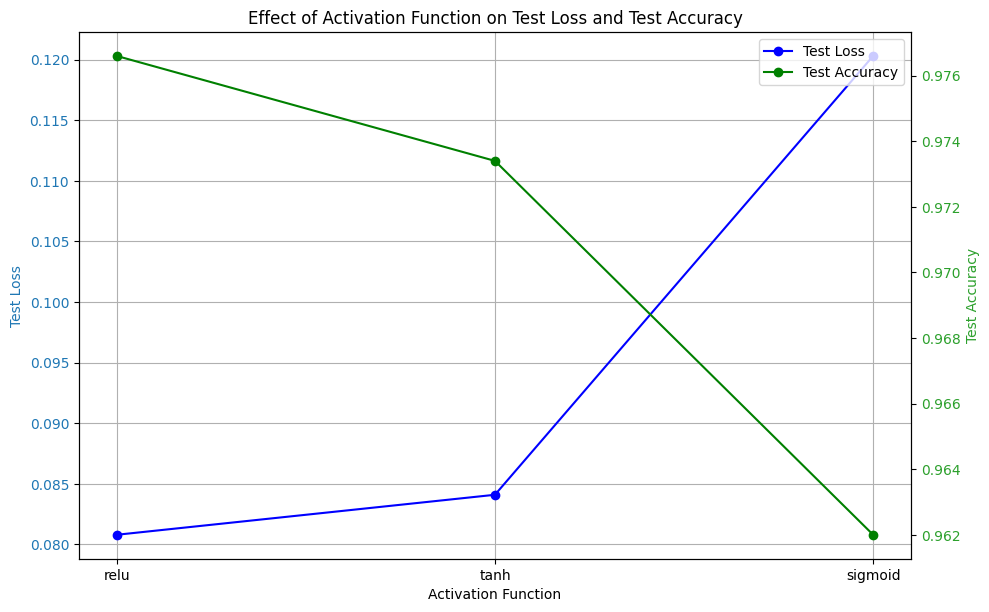

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
activations = ['relu', 'tanh', 'sigmoid']
test_losses = [0.0808, 0.0841, 0.1203]
test_accuracies = [0.9766, 0.9734, 0.9620]

# Convert act funcs to numbers so we can plot
activation_numeric = [0, 1, 2]  # relu=0, tanh=1, sigmoid=2

# Fit poly to the data
loss_poly = np.polyfit(activation_numeric, test_losses, 2)                  # 2nd degree poly
accuracy_poly = np.polyfit(activation_numeric, test_accuracies, 2)          # 2nd degree poly
x_fit = np.linspace(min(activation_numeric), max(activation_numeric), 100)

# Trend lines
loss_trend = np.polyval(loss_poly, x_fit)
accuracy_trend = np.polyval(accuracy_poly, x_fit)

fig, ax1 = plt.subplots(figsize=(7, 5))   # Create the plot


color = 'tab:blue'
ax1.set_xlabel('Activation Function')
ax1.set_ylabel('Test Loss', color=color)
ax1.plot(activation_numeric, test_losses, 'bo', label='Test Loss')
ax1.plot(x_fit, loss_trend, 'b-', label='Loss Trend Line')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(activation_numeric)
ax1.set_xticklabels(activations)
ax1.grid(True)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Test Accuracy', color=color)  # We already handled the x-label with ax1
ax2.plot(activation_numeric, test_accuracies, 'go', label='Test Accuracy')
ax2.plot(x_fit, accuracy_trend, 'g-', label='Accuracy Trend Line')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # No overlap

plt.title('Activation Function vs Test Loss and Test Accuracy')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()


# Optimised Model Testing



11490434/11490434 [==============================] - 0s 0us/step
Testing model with layers=3, neurons=[512, 256, 128, 64], activation=relu, dropout_rate=0.5

Experiment Results:

Layers  Neurons              Activation Dropout    Avg Val Accuracy
3       [512, 256, 128, 64]  relu       0.5        0.9790         

Best Result: Layers=3, Neurons=[512, 256, 128, 64], Activation=relu, Dropout Rate=0.5, Avg Val Accuracy=0.9790166616439819
313/313 [==============================] - 1s 2ms/step


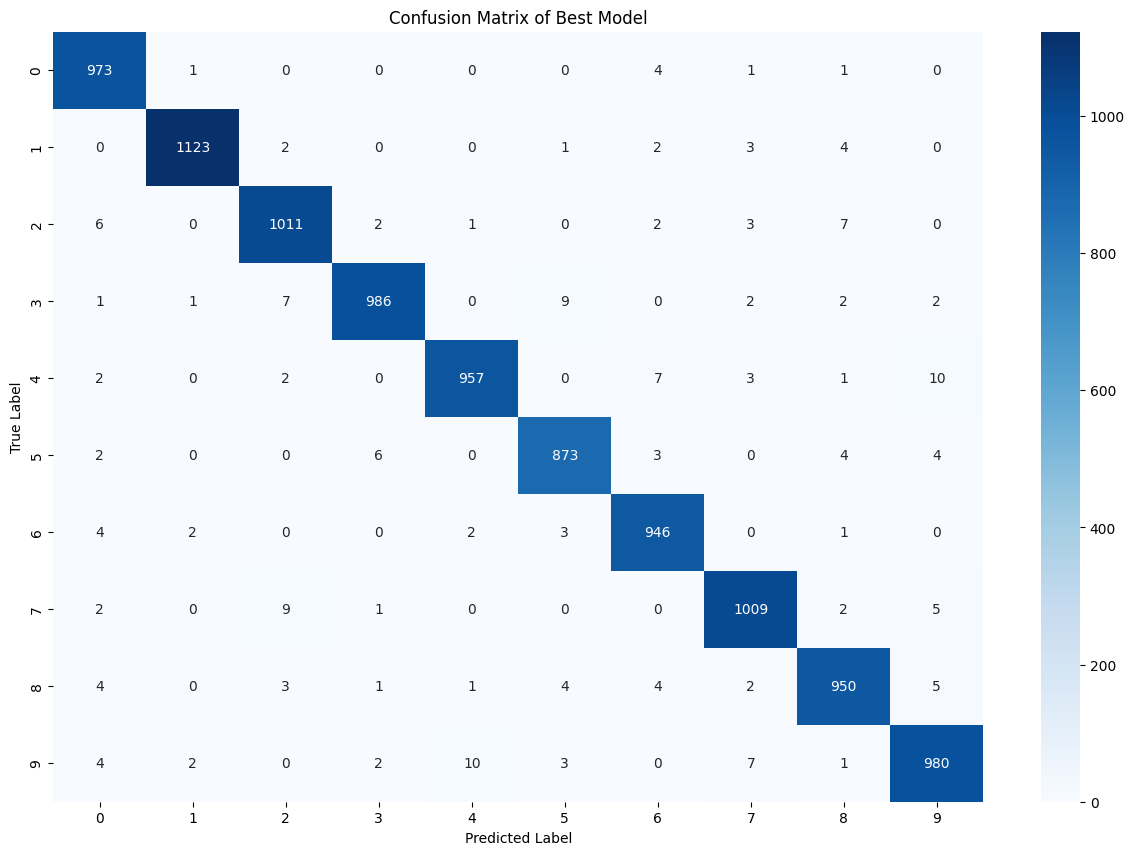

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load dataset (normalise, shape, fit etc)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Create model function
def create_model(layers, neurons, activation, dropout_rate):
    model = Sequential()
    model.add(Dense(neurons[0], input_shape = (784,), activation = activation))
    for units in neurons[1:]:
        model.add(Dense(units, activation = activation))
        model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])

    return model

# Parameters to test (ideal parameters)
layer_configs = [4]
neuron_configs = [[512, 256, 128, 64]]
activations = ['relu']
dropout_rates = [0.25]

# Loop through parameters
results = []
for layers in layer_configs:
    for neurons in neuron_configs:
        if len(neurons) == layers:
            for activation in activations:
                for dropout_rate in dropout_rates:
                    print(f"Testing model with layers={layers}, neurons={neurons}, activation={activation}, dropout_rate={dropout_rate}")
                    model = create_model(layers, neurons, activation, dropout_rate)
                    history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2, verbose=0)
                    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
                    results.append({
                        'layers': layers,
                        'neurons': neurons,
                        'activation': activation,
                        'dropout_rate': dropout_rate,
                        'test_loss': test_loss,
                        'test_acc': test_acc
                    })

# Print results in a clear format
print("\nExperiment Results:\n")
print(f"{'Layers':<7} {'Neurons':<20} {'Activation':<10} {'Dropout':<10} {'Test Loss':<10} {'Test Accuracy':<12}")
print("="*70)
for result in results:
    print(f"{result['layers']:<7} {str(result['neurons']):<20} {result['activation']:<10} {result['dropout_rate']:<10} {result['test_loss']:<10.4f} {result['test_acc']:<12.4f}")

# Find the best result
best_result = max(results, key=lambda x: x['test_acc'])
print(f"\nBest Result: Layers={best_result['layers']}, Neurons={best_result['neurons']}, Activation={best_result['activation']}, Dropout Rate={best_result['dropout_rate']}, Test Loss={best_result['test_loss']}, Test Accuracy={best_result['test_acc']}")

# Plot the confusion matrix of the best model
best_model = create_model(best_result['layers'], best_result['neurons'], best_result['activation'], best_result['dropout_rate'])
best_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2, verbose=0)
y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap="Blues", ax=ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix of Best Model')
plt.show()


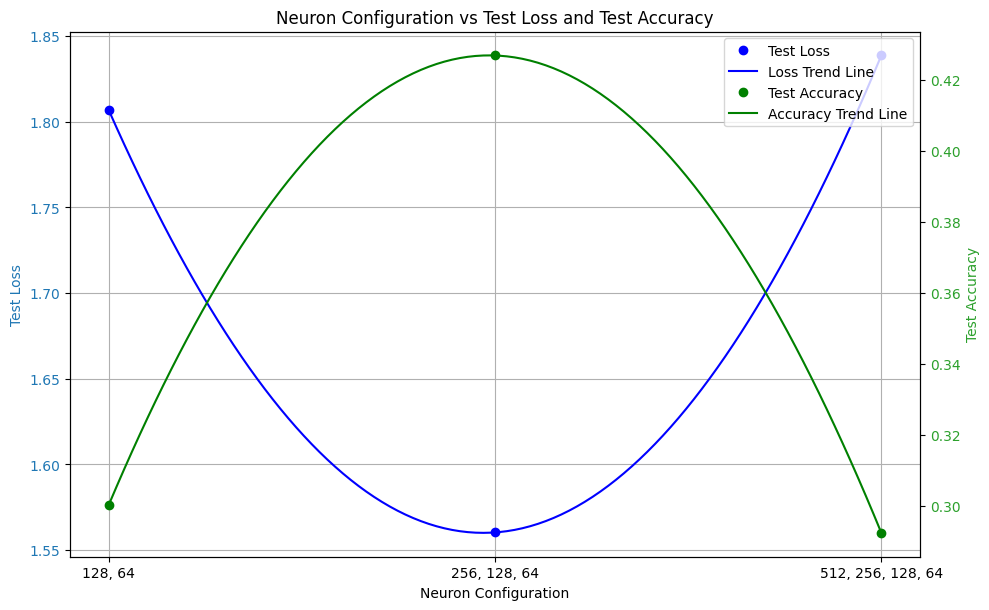

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data (got from running earlier code)
neuron_configs = ['128, 64', '256, 128, 64', '512, 256, 128, 64']
test_losses = [1.8067, 1.5602, 1.8387]
test_accuracies = [0.3002, 0.4269, 0.2923]

# Convert neuron configurations to numbers
neuron_indices = [0, 1, 2]

# Fit poly to the data
loss_poly = np.polyfit(neuron_indices, test_losses, 2)          # 2nd degree poly
accuracy_poly = np.polyfit(neuron_indices, test_accuracies, 2)  # 2nd degree poly

# Trend lines
x_fit = np.linspace(min(neuron_indices), max(neuron_indices), 100)
loss_trend = np.polyval(loss_poly, x_fit)
accuracy_trend = np.polyval(accuracy_poly, x_fit)

fig, ax1 = plt.subplots(figsize=(10, 6))  # Create plot

color = 'tab:blue'
ax1.set_xlabel('Neuron Configuration')
ax1.set_ylabel('Test Loss', color=color)
ax1.plot(neuron_indices, test_losses, 'bo', label='Test Loss')
ax1.plot(x_fit, loss_trend, 'b-', label='Loss Trend Line')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(neuron_indices)
ax1.set_xticklabels(neuron_configs)
ax1.grid(True)

# Layout graph with layered axes
ax2 = ax1.twinx()  # Second y-axis so we can plot loss and accuracy on same plot?
color = 'tab:green'
ax2.set_ylabel('Test Accuracy', color=color)  # We already handled the x-label with ax1
ax2.plot(neuron_indices, test_accuracies, 'go', label='Test Accuracy')
ax2.plot(x_fit, accuracy_trend, 'g-', label='Accuracy Trend Line')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

plt.title('Neuron Configuration vs Test Loss and Test Accuracy')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()


#**Testing with our own dataset**


*   Download Images folder to the relevant location on your drive or file manager



In [13]:
# Code to import from google drive for use in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 [==============================] - 0s 61ms/step


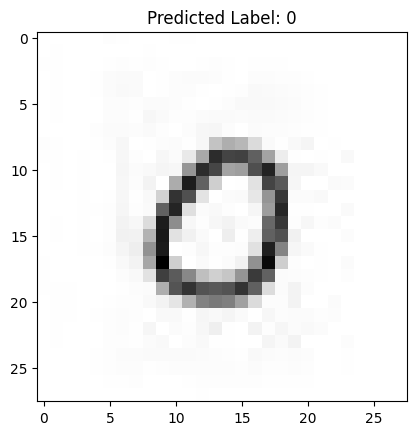

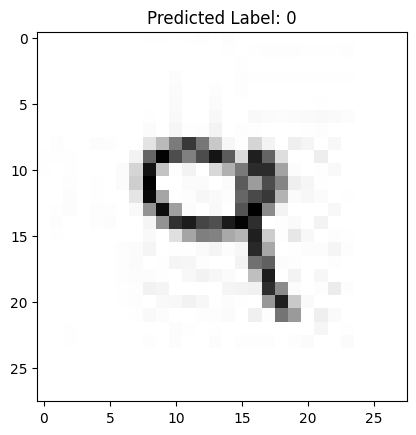

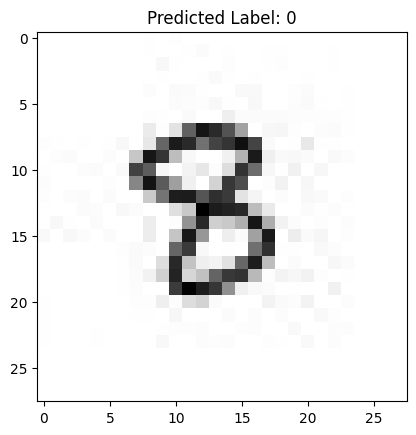

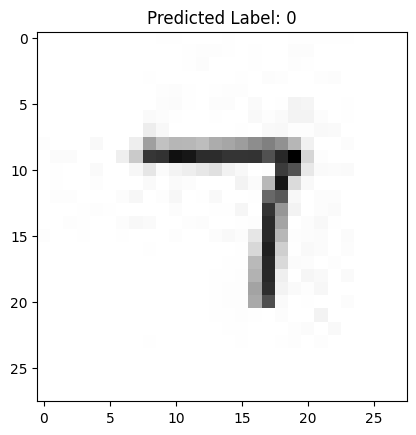

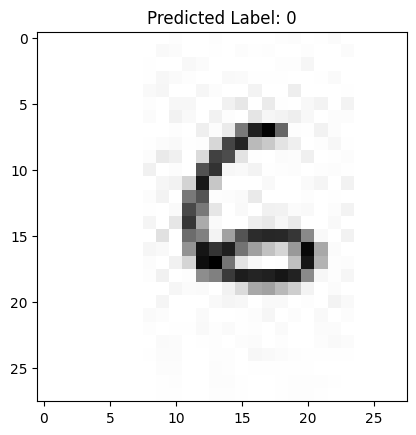

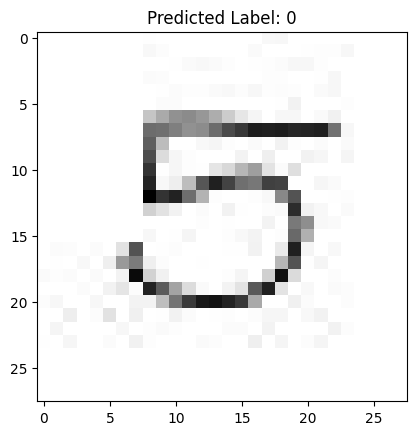

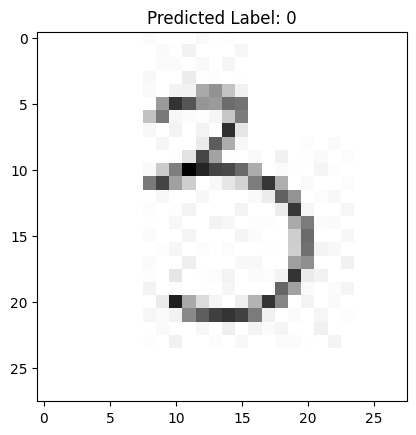

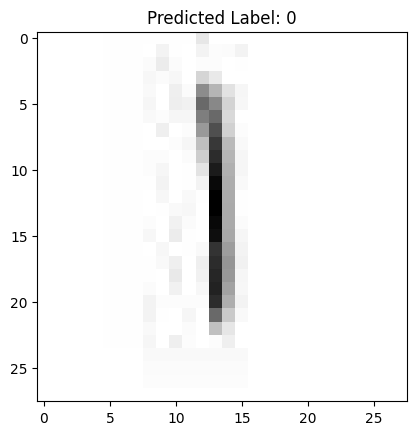

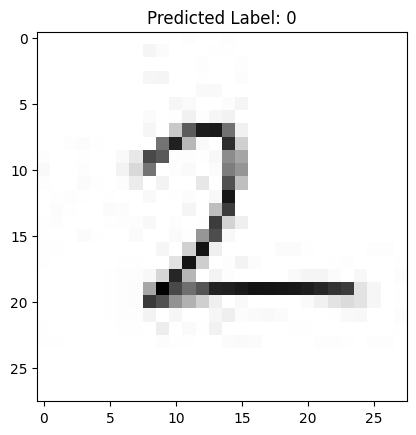

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
from keras.models import load_model
from keras.preprocessing import image
import seaborn as sns

best_model = create_model(best_result['layers'], best_result['neurons'], best_result['activation'], best_result['dropout_rate'])

# Load trained model
#best_model = load_model('path')

# Path to image folder
# Use baby test set cause big set takes too way too long (find out why it takes long)
path = '/content/drive/MyDrive/Images'

# Load and preprocess the images in the folder
images = []
for filename in os.listdir(path):
    if filename.endswith(".jpg"):
        img_path = os.path.join(path, filename)
        img = image.load_img(img_path, target_size=(28, 28), color_mode = 'grayscale')
        img_array = image.img_to_array(img)
        img_array = img_array.reshape(28*28)
        img_array = img_array/255.0
        images.append(img_array)

images = np.array(images)

# Reshape data to match model input
images = images.reshape(-1, 28*28)

# Predict image labels
predictions = best_model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Display predictions and images
for i in range(len(images)):
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Label: {predicted_labels[i]}")
    plt.show()

# Maybe add some formatting? Accuracy stuff

1/1 [==============================] - 0s 122ms/step


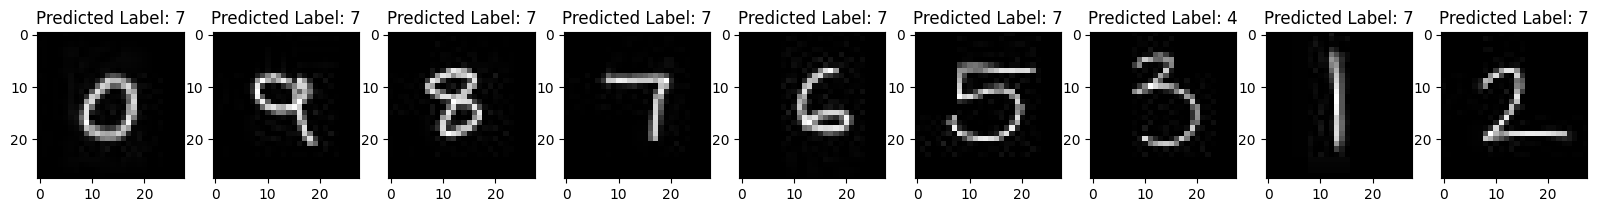

In [25]:
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
from keras.models import load_model
from keras.preprocessing import image
import seaborn as sns

# Load trained model
best_model = create_model(best_result['layers'], best_result['neurons'], best_result['activation'], best_result['dropout_rate'])

# Path to image folder
path = '/content/drive/MyDrive/Images'

# Image processing
images = []
for filename in os.listdir(path):
    if filename.endswith(".jpg"):
        img_path = os.path.join(path, filename)
        img = image.load_img(img_path, target_size=(28, 28), color_mode = 'grayscale')
        img_array = image.img_to_array(img)

        inverted_img_array = 255 - img_array            # (mnist dataset has black background)

        # Rescale pixel values
        inverted_img_array = inverted_img_array/255.0
        inverted_img_array = inverted_img_array.reshape(28 * 28)

        images.append(inverted_img_array)

images = np.array(images)

# Predict image labels
predictions = best_model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)



# Display or save the predictions along with the corresponding images
#for i in range(len(images)):
 #   plt.imshow(images[i].reshape(28, 28), cmap='gray')
  #  plt.title(f"Predicted Label: {predicted_labels[i]}")
   # plt.show()

f, ax = plt.subplots(1, 9, figsize = (20, 2))

# Display in OG format
for i in range(min(len(images), 9)):
  ax[i].imshow(images[i].reshape(28, 28), cmap='gray')
  ax[i].set_title(f"Predicted Label: {predicted_labels[i]}")